In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('World Happiness Report.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


# Exploratory Data Analysis

In [5]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
print('The Shape of the dataset is ',df.shape)

The Shape of the dataset is  (158, 12)


In [7]:
print('The number of duplicated values in dataset is ',df.duplicated().sum())

The number of duplicated values in dataset is  0


We have no duplicate values in the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [9]:
Cat_Cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='O':
        Cat_Cols.append(x)
print('Categorical columns are ',Cat_Cols)

Num_Cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='int64' or df.dtypes[x]=='float64':
        Num_Cols.append(x)
print('Numerical columns are ',Num_Cols)

Categorical columns are  ['Country', 'Region']
Numerical columns are  ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


In [10]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

We have no null values in the dataset

In [11]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


By looking this statistical description, we assume that the data is not skewed and has no outliers

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


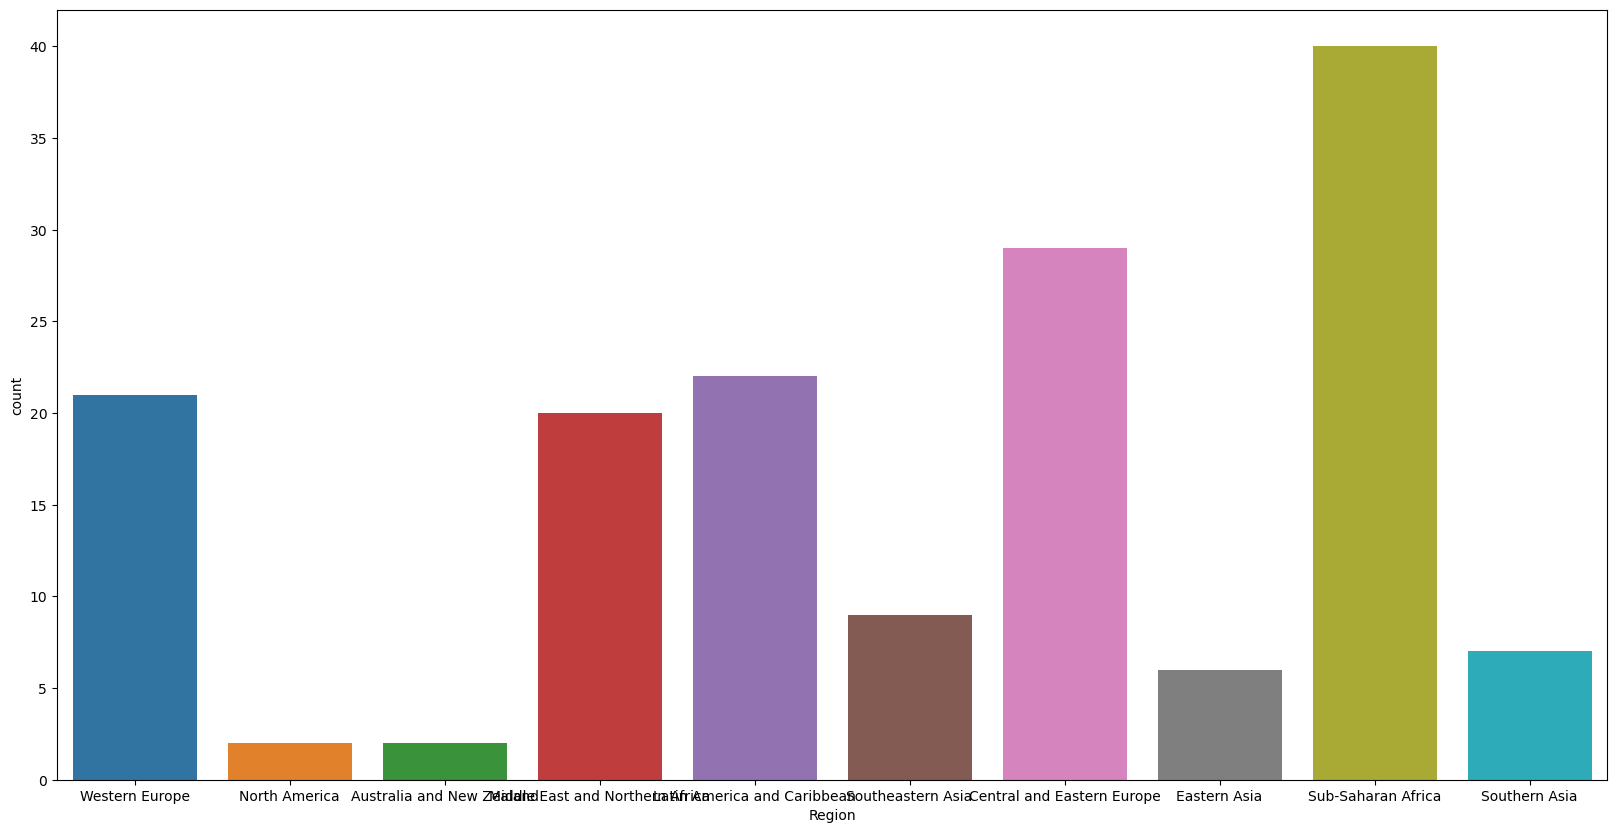

In [12]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='Region',data=df)
print(df['Region'].value_counts())

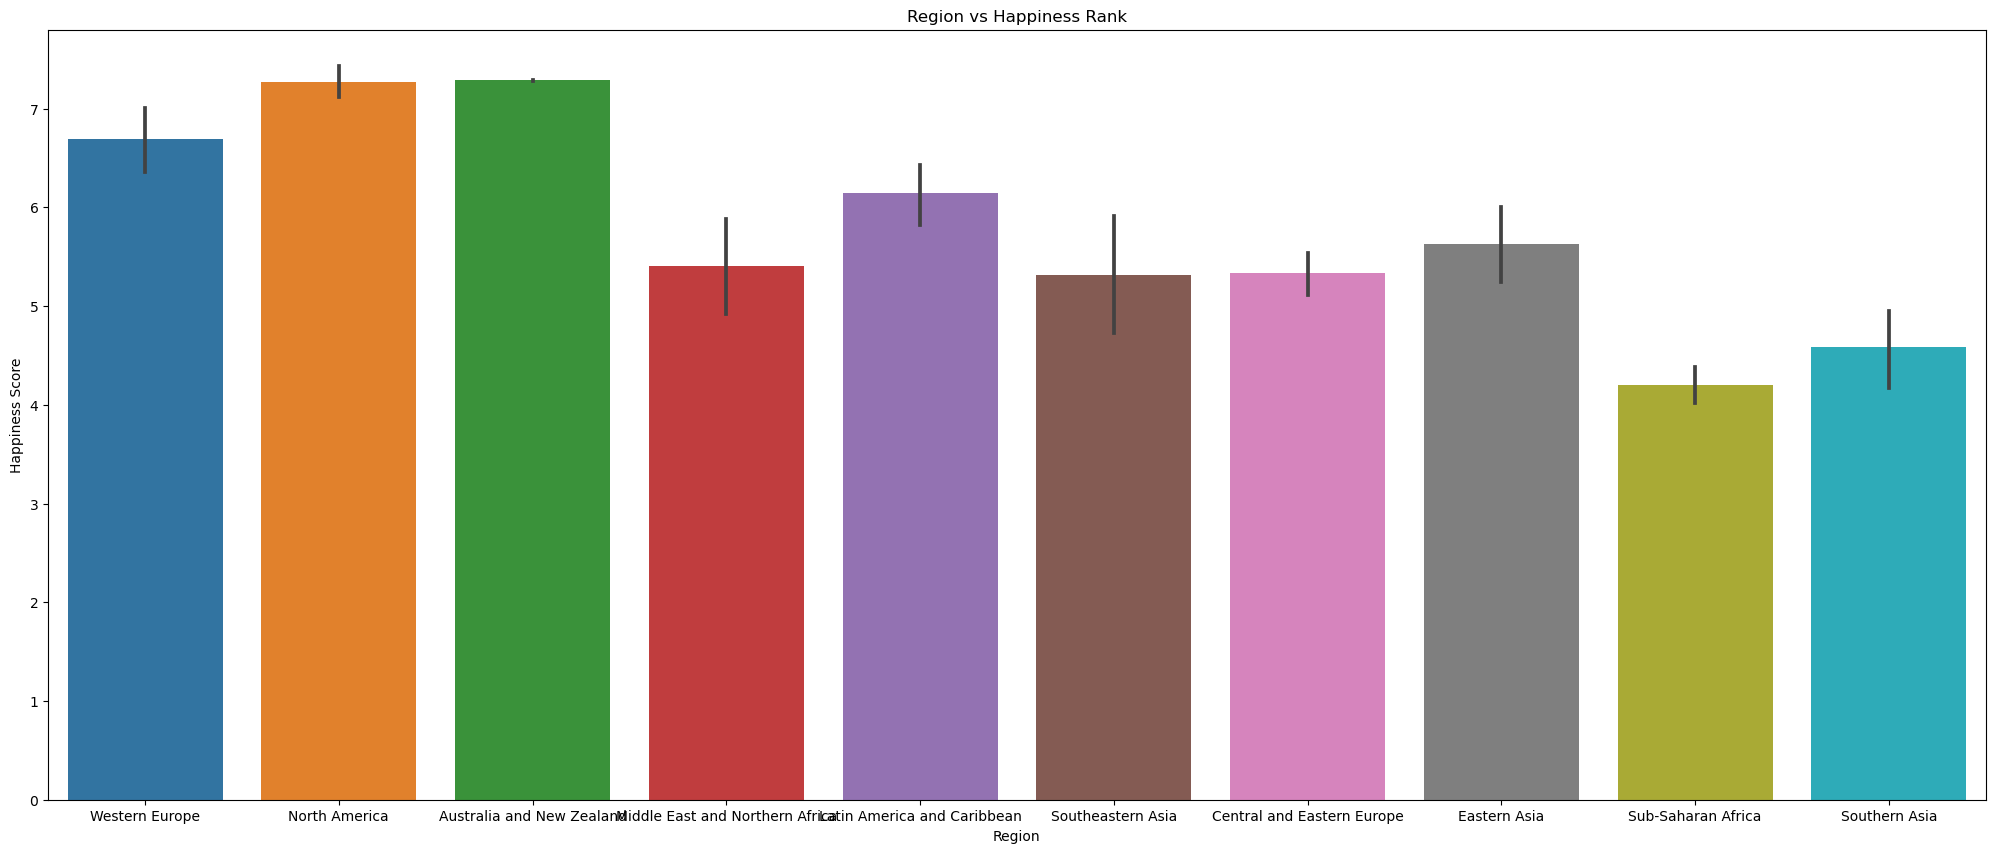

In [13]:
plt.figure(figsize=(25,10))
plt.title('Region vs Happiness Rank')
sns.barplot(x='Region',y='Happiness Score',data=df)
plt.show()

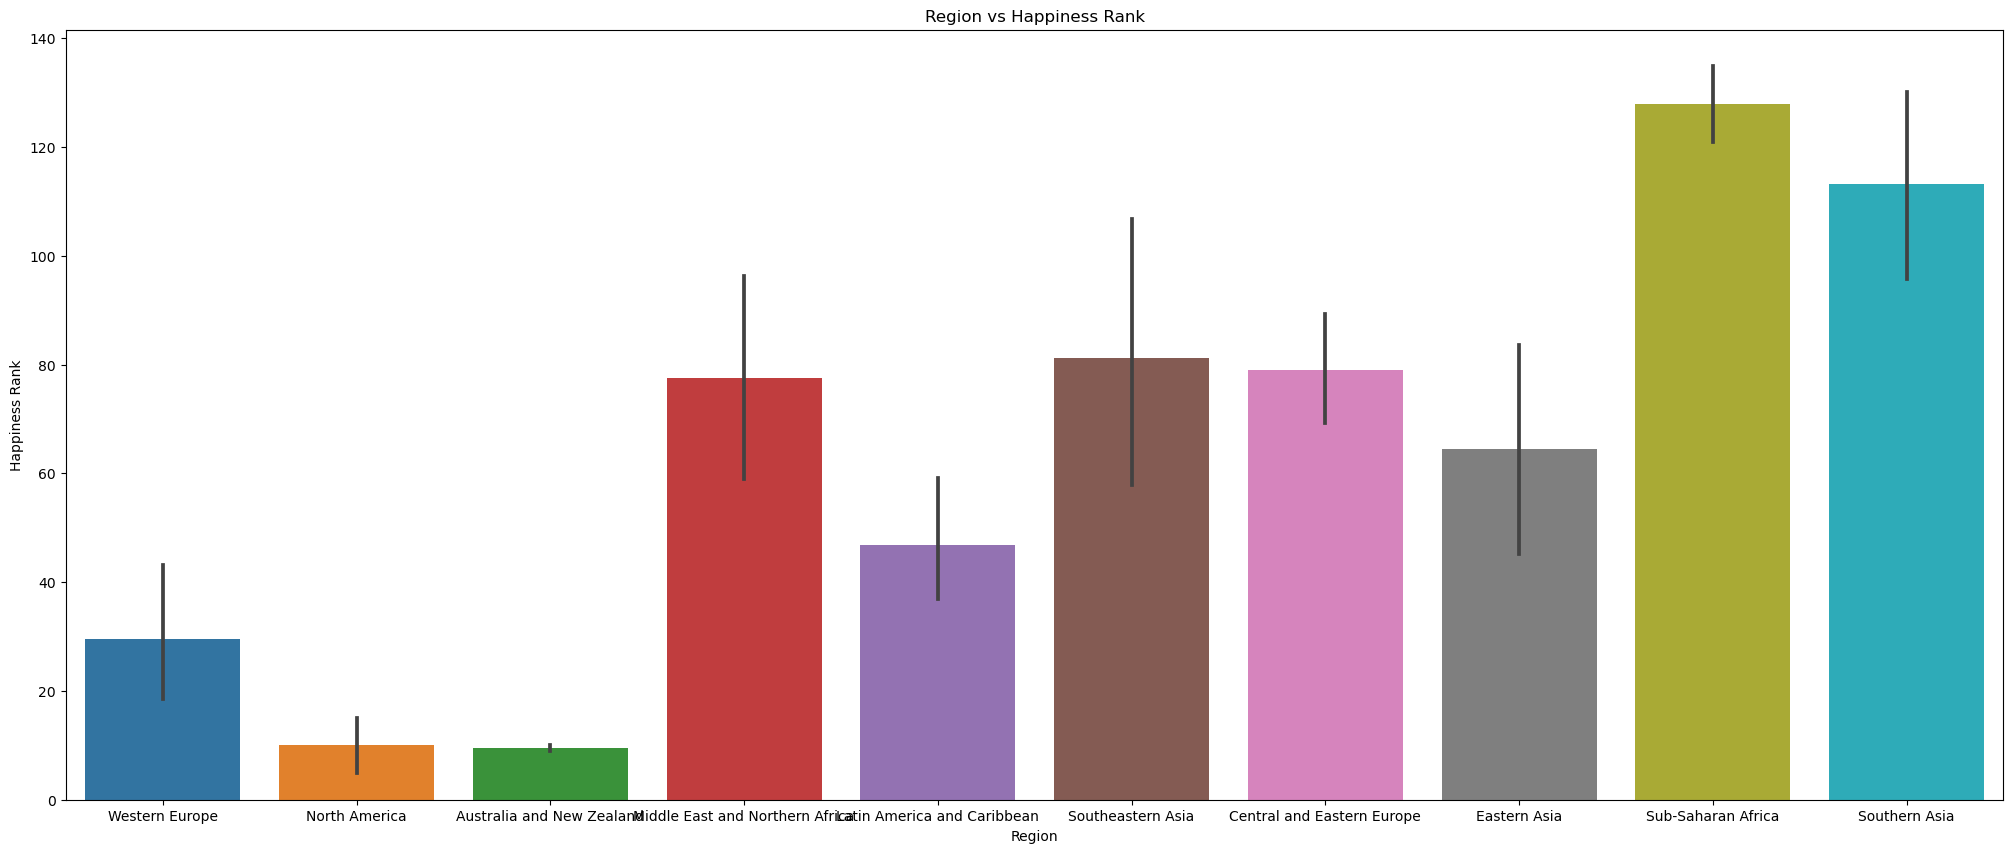

In [14]:
plt.figure(figsize=(25,10))
plt.title('Region vs Happiness Rank')
sns.barplot(x='Region',y='Happiness Rank',data=df)
plt.show()

<AxesSubplot:xlabel='Happiness Score', ylabel='Happiness Rank'>

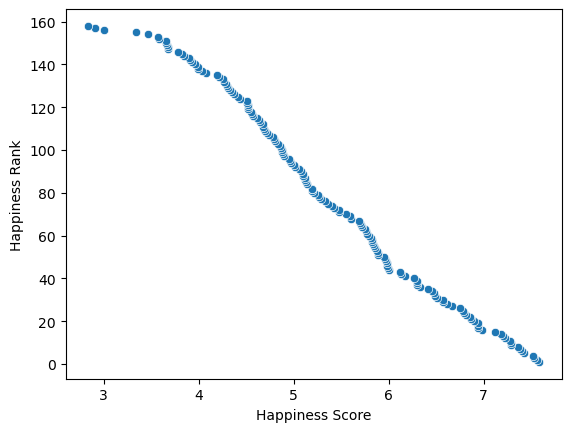

In [15]:
sns.scatterplot(x='Happiness Score',y='Happiness Rank',data=df)

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

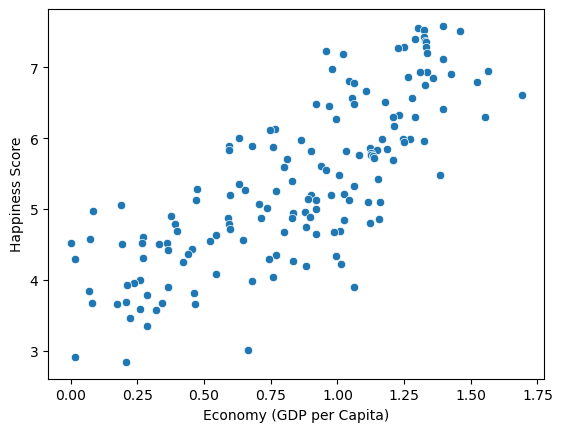

In [16]:
sns.scatterplot(x='Economy (GDP per Capita)',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

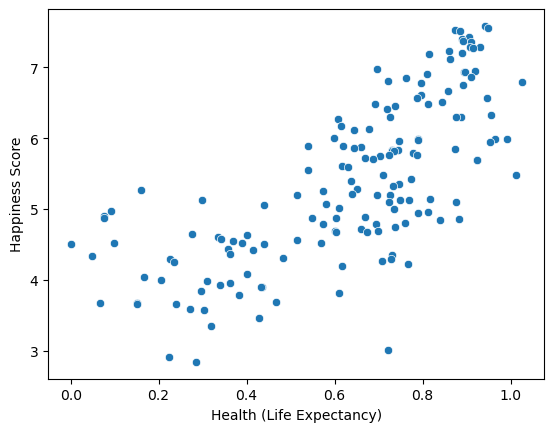

In [17]:
sns.scatterplot(x='Health (Life Expectancy)',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

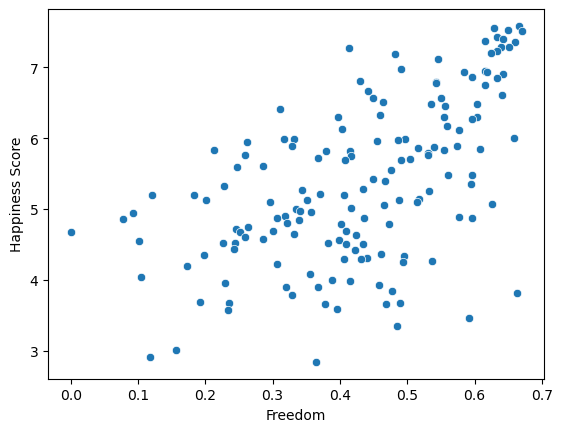

In [18]:
sns.scatterplot(x='Freedom',y='Happiness Score',data=df)

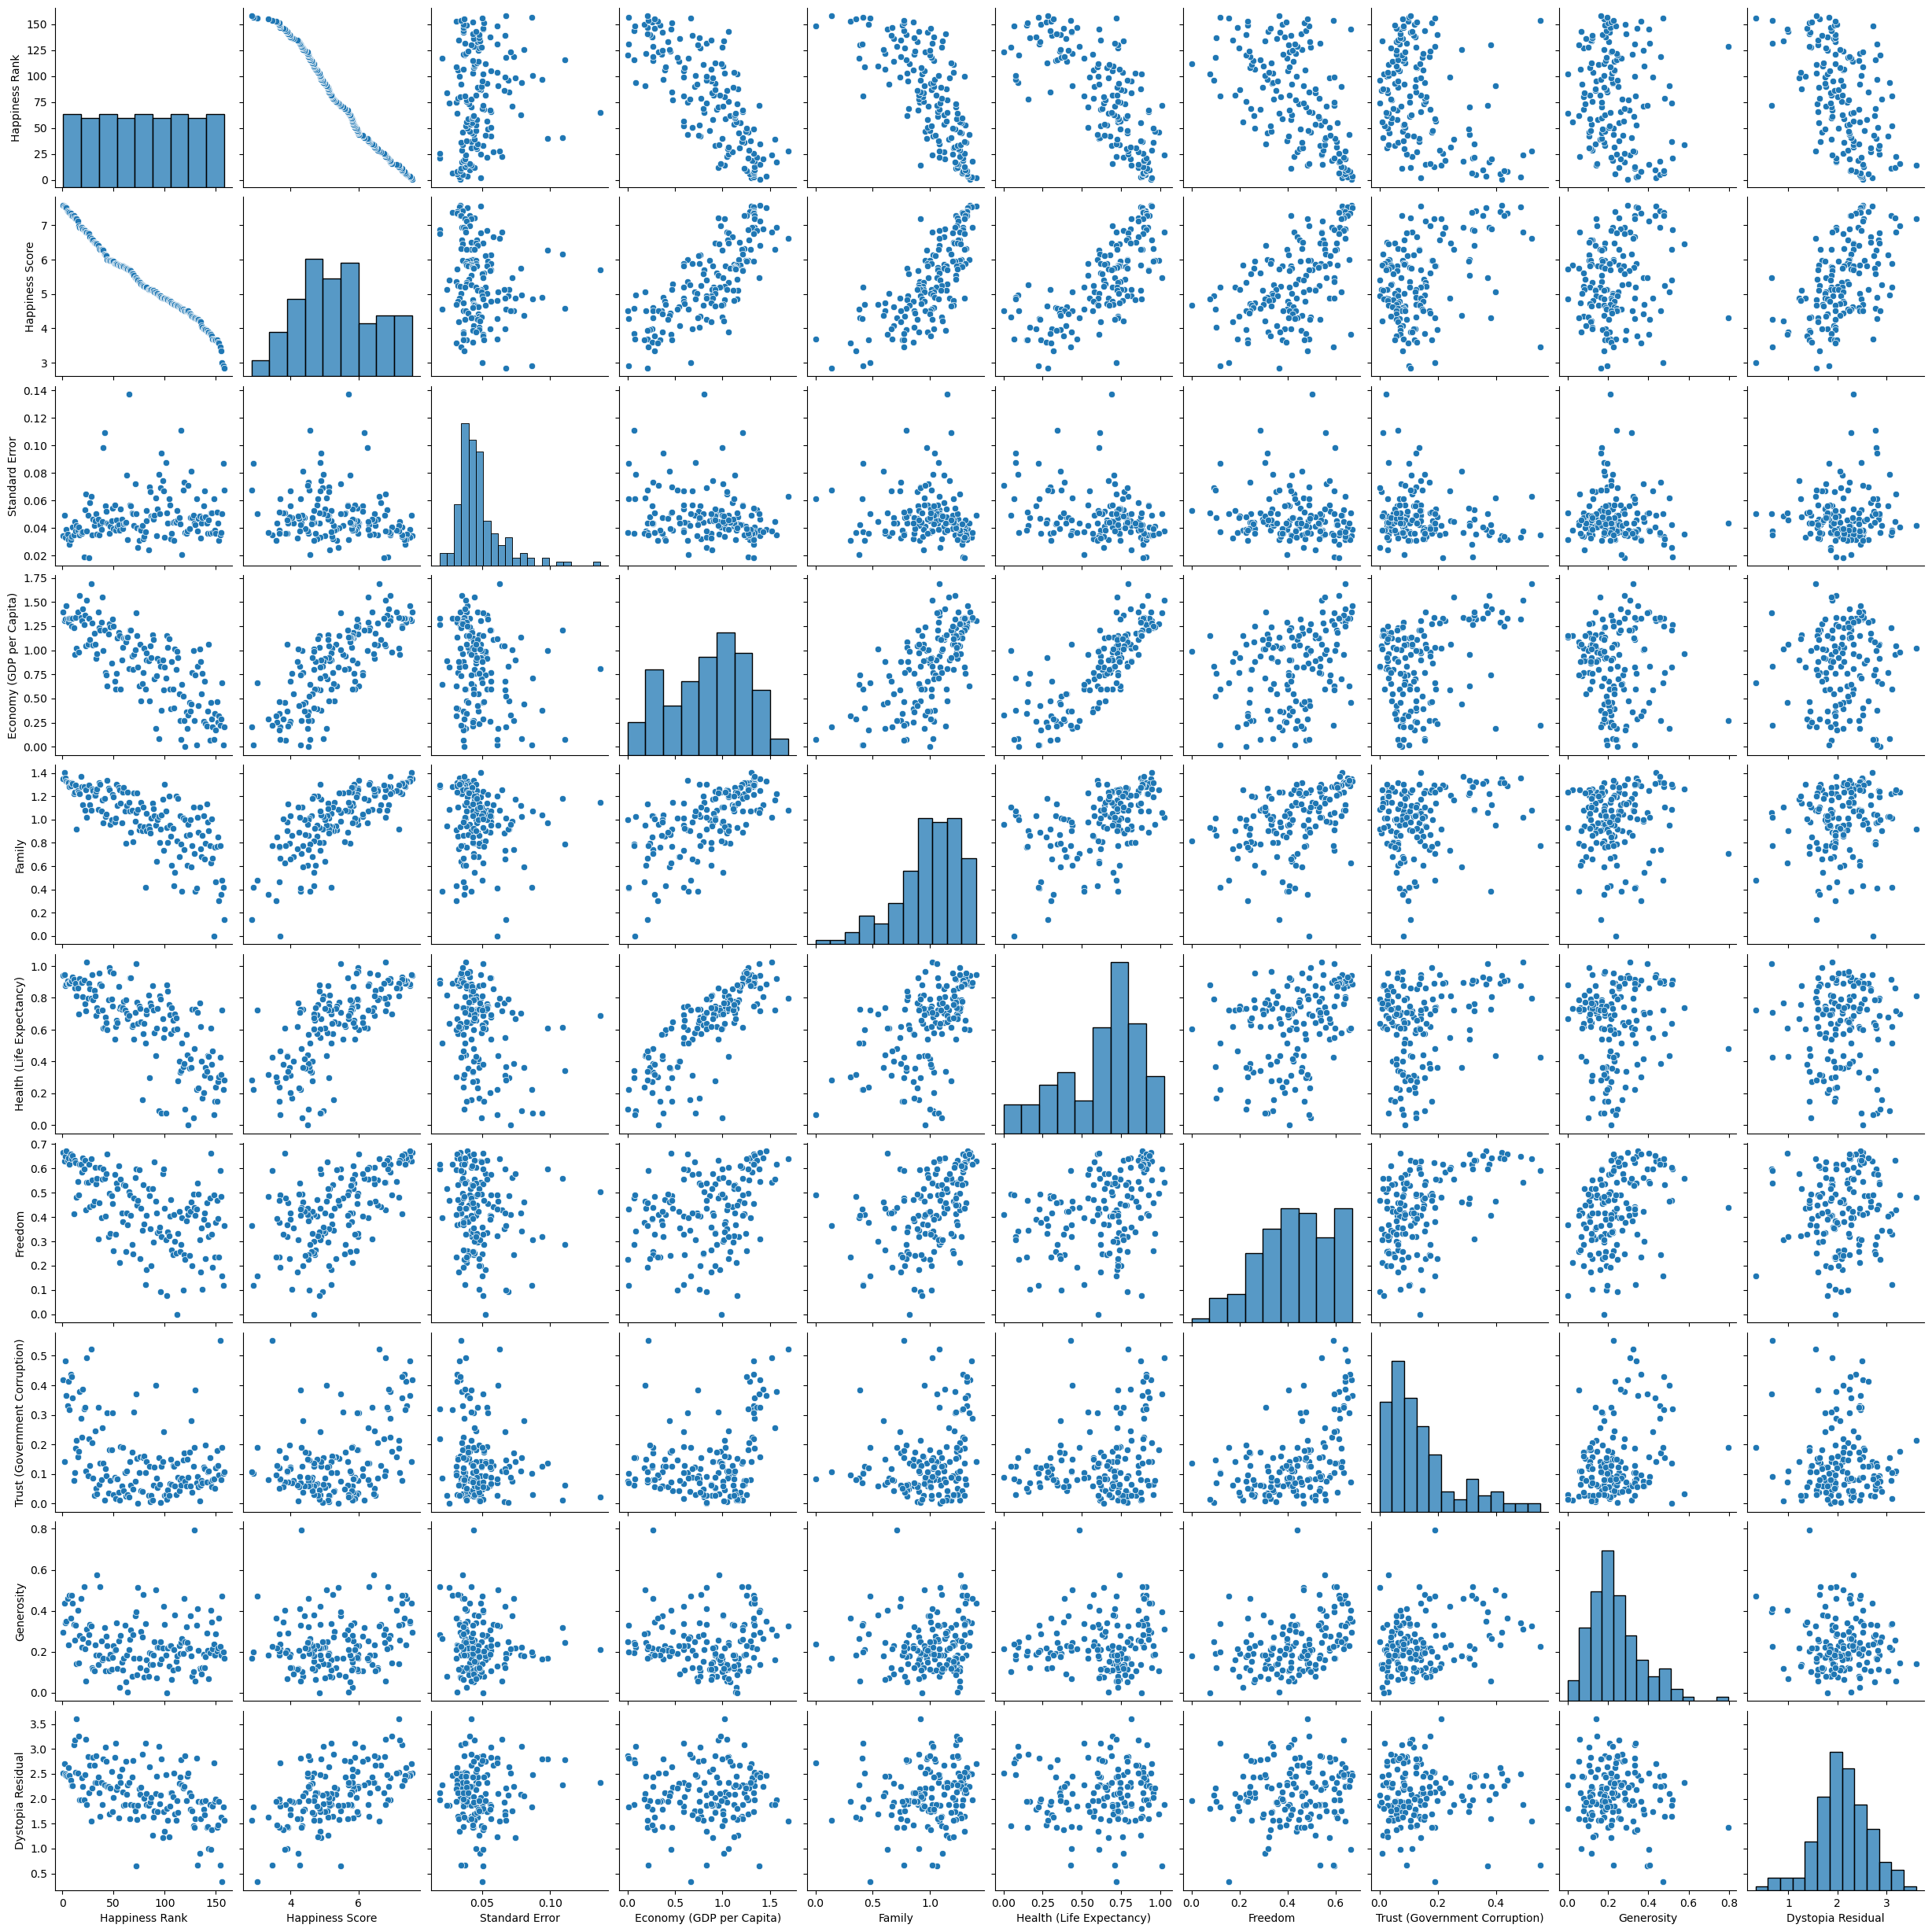

In [19]:
sns.pairplot(df)

Happiness Rank                      AxesSubplot(0.125,0.747241;0.133621x0.132759)
Happiness Score                  AxesSubplot(0.285345,0.747241;0.133621x0.132759)
Standard Error                    AxesSubplot(0.44569,0.747241;0.133621x0.132759)
Economy (GDP per Capita)         AxesSubplot(0.606034,0.747241;0.133621x0.132759)
Family                           AxesSubplot(0.766379,0.747241;0.133621x0.132759)
Health (Life Expectancy)            AxesSubplot(0.125,0.587931;0.133621x0.132759)
Freedom                          AxesSubplot(0.285345,0.587931;0.133621x0.132759)
Trust (Government Corruption)     AxesSubplot(0.44569,0.587931;0.133621x0.132759)
Generosity                       AxesSubplot(0.606034,0.587931;0.133621x0.132759)
Dystopia Residual                AxesSubplot(0.766379,0.587931;0.133621x0.132759)
dtype: object

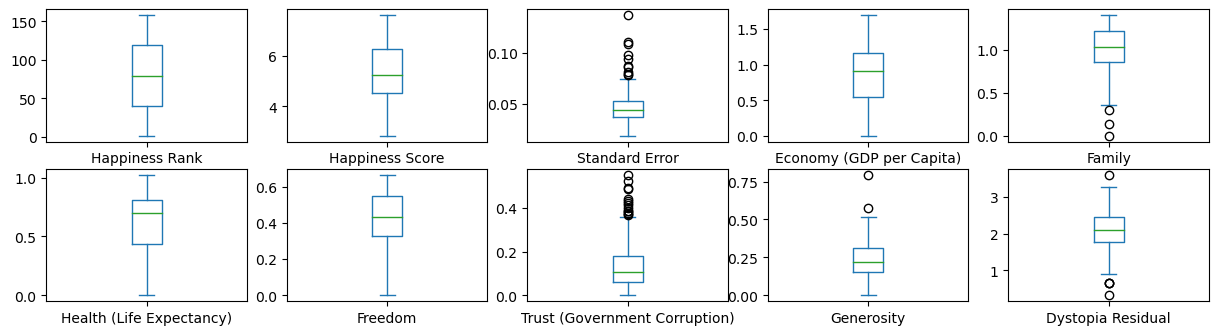

In [20]:
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(15,10))

Outliers are present in Trust and Standard Error

# Encoding Techniques

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()

In [23]:
for i in df[Cat_Cols]:
    df[i]=le.fit_transform(df[i])
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Country                             AxesSubplot(0.125,0.747241;0.133621x0.132759)
Region                           AxesSubplot(0.285345,0.747241;0.133621x0.132759)
Happiness Rank                    AxesSubplot(0.44569,0.747241;0.133621x0.132759)
Happiness Score                  AxesSubplot(0.606034,0.747241;0.133621x0.132759)
Standard Error                   AxesSubplot(0.766379,0.747241;0.133621x0.132759)
Economy (GDP per Capita)            AxesSubplot(0.125,0.587931;0.133621x0.132759)
Family                           AxesSubplot(0.285345,0.587931;0.133621x0.132759)
Health (Life Expectancy)          AxesSubplot(0.44569,0.587931;0.133621x0.132759)
Freedom                          AxesSubplot(0.606034,0.587931;0.133621x0.132759)
Trust (Government Corruption)    AxesSubplot(0.766379,0.587931;0.133621x0.132759)
Generosity                          AxesSubplot(0.125,0.428621;0.133621x0.132759)
Dystopia Residual                AxesSubplot(0.285345,0.428621;0.133621x0.132759)
dtype: object

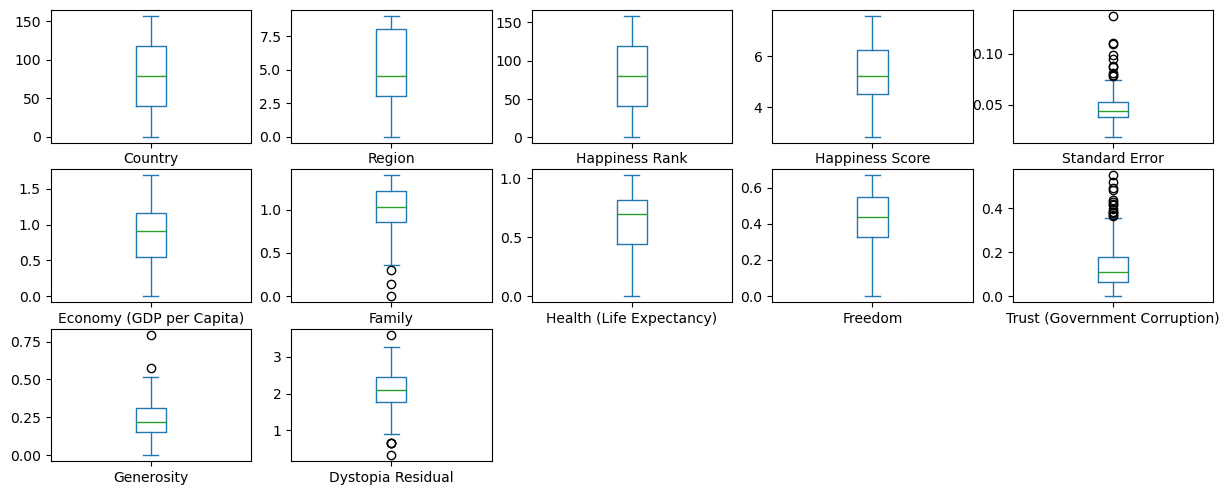

In [24]:
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(15,10))

# Removing Outliers by Zscore method

In [25]:
from scipy.stats import zscore

In [26]:
z=np.abs(zscore(df))
z

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.238770,1.300256,1.721000,1.937360,0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,0.449465,1.300256,1.699075,1.914581,0.055889,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857
2,0.909893,1.300256,1.677149,1.884792,0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,0.581016,1.300256,1.655224,1.880411,0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,1.194920,0.040302,1.633299,1.797179,0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.866043,0.965117,1.633576,1.674055,0.774917,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925
154,1.436096,0.965117,1.655501,1.783571,0.662582,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967
155,1.260695,0.375441,1.677427,2.076199,0.132534,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430
156,1.260695,0.965117,1.699352,2.164688,2.263962,2.067566,2.118467,1.649648,2.064472,0.357715,0.316950,0.481985


In [27]:
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([ 9,  4,  4,  4, 10,  6,  9, 11,  6], dtype=int64))


In [28]:
df_new=df[(z<3).all(axis=1)]
df_new

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,7,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [29]:
print('Data Loss Percentage after removing outliers with Z score method- ',((df.shape[0]-df_new.shape[0])/df.shape[0])*100)

Data Loss Percentage after removing outliers with Z score method-  5.69620253164557


# Removing Outliers by IQR method

In [30]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

df1=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [31]:
print('Data Loss Percentage after removing outliers with IQR method- ',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage after removing outliers with IQR method-  20.253164556962027


We are taking df_new. Because it has less data loss

In [32]:
df_new.skew()

Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

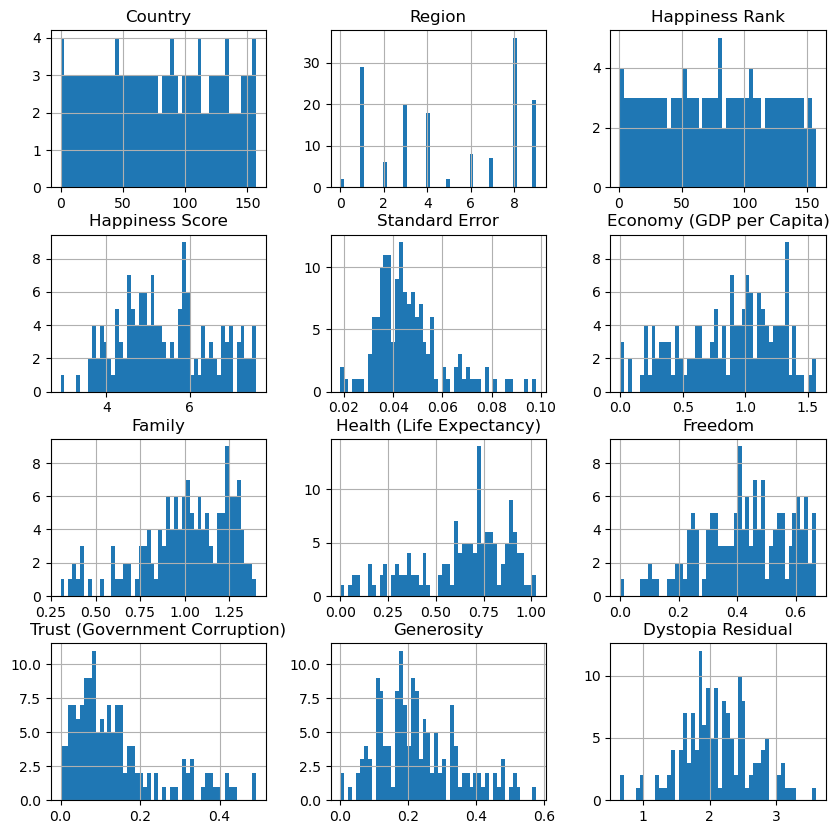

In [33]:
df_new.hist(figsize=(10,10),bins=50)
plt.show()

In [34]:
for col in df_new:
    if df_new.skew().loc[col]>0.55:
        df_new[col]=np.log1p(df_new[col])

In [35]:
df.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


<AxesSubplot:>

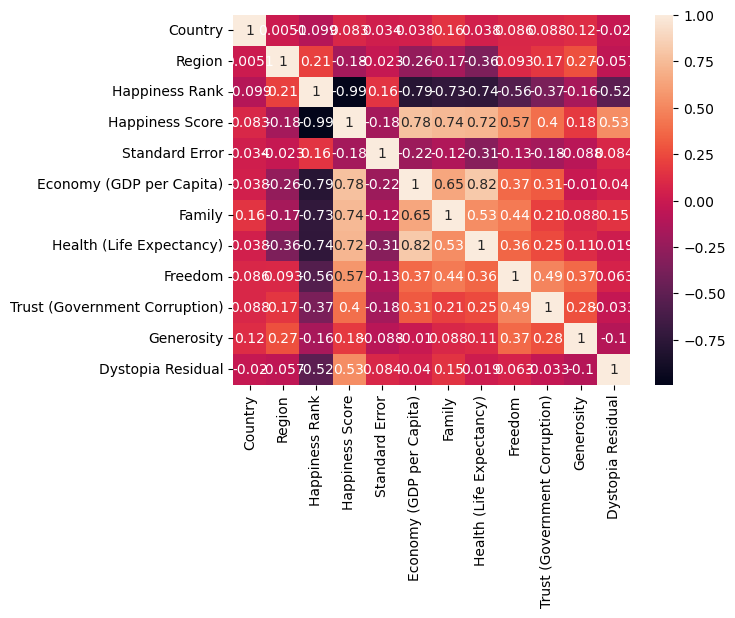

In [36]:
sns.heatmap(df.corr(),annot=True)

# Feature Selection

In [37]:
x=df_new.drop('Happiness Score',axis=1)
y=df_new['Happiness Score']

In [38]:
x.shape

(149, 11)

In [39]:
y.shape

(149,)

In [40]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.268260,1.296837,-1.713905,-0.872111,1.381916,1.357879,1.235390,1.583704,2.376963,0.591975,0.756876
1,-0.417415,1.296837,-1.691535,0.193583,1.138324,1.567882,1.261541,1.338953,0.058399,1.667927,1.109300
2,-0.877145,1.296837,-1.669166,-0.932612,1.198220,1.401974,0.962900,1.476027,2.843958,0.948100,0.708507
3,0.611504,1.296837,-1.646796,-0.531158,1.543526,1.283947,1.006023,1.611371,1.959100,0.991966,0.657485
4,-1.161739,-0.026647,-1.624427,-0.768717,1.200315,1.250726,1.089333,1.366887,1.679422,1.826611,0.631620
...,...,...,...,...,...,...,...,...,...,...,...
144,-0.242280,0.965966,1.641542,0.377985,-1.026255,-0.945943,-1.985941,0.274090,0.404308,-0.210240,-1.343100
145,-1.249307,0.965966,1.663911,-0.209795,-1.562163,-0.624365,-1.498813,-0.216276,-0.064536,-0.072524,-1.252030
146,-1.687145,0.635095,1.686281,-1.110750,-1.402596,-2.811354,-1.367851,-1.285662,-0.361817,1.132587,-0.322135
147,-1.402550,0.965966,1.731020,-0.693809,-1.488379,-2.608163,-1.303594,0.379439,-0.528627,-0.378501,-0.930702


In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

vif

,Features,VIF values
0,Country,1.067591
1,Region,1.492856
2,Happiness Rank,87.230656
3,Standard Error,1.212537
4,Economy (GDP per Capita),14.319065
5,Family,6.525104
6,Health (Life Expectancy),9.112875
7,Freedom,3.626562
8,Trust (Government Corruption),2.002317
9,Generosity,2.279275


In [43]:
x1=x.drop('Happiness Rank',axis=1)
x1

,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.268260,1.296837,-0.872111,1.381916,1.357879,1.235390,1.583704,2.376963,0.591975,0.756876
1,-0.417415,1.296837,0.193583,1.138324,1.567882,1.261541,1.338953,0.058399,1.667927,1.109300
2,-0.877145,1.296837,-0.932612,1.198220,1.401974,0.962900,1.476027,2.843958,0.948100,0.708507
3,0.611504,1.296837,-0.531158,1.543526,1.283947,1.006023,1.611371,1.959100,0.991966,0.657485
4,-1.161739,-0.026647,-0.768717,1.200315,1.250726,1.089333,1.366887,1.679422,1.826611,0.631620
...,...,...,...,...,...,...,...,...,...,...
144,-0.242280,0.965966,0.377985,-1.026255,-0.945943,-1.985941,0.274090,0.404308,-0.210240,-1.343100
145,-1.249307,0.965966,-0.209795,-1.562163,-0.624365,-1.498813,-0.216276,-0.064536,-0.072524,-1.252030
146,-1.687145,0.635095,-1.110750,-1.402596,-2.811354,-1.367851,-1.285662,-0.361817,1.132587,-0.322135
147,-1.402550,0.965966,-0.693809,-1.488379,-2.608163,-1.303594,0.379439,-0.528627,-0.378501,-0.930702


In [44]:
vif=pd.DataFrame()
vif['Features']=x1.columns
vif['VIF values']=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]

vif

,Features,VIF values
0,Country,1.062418
1,Region,1.427088
2,Standard Error,1.187549
3,Economy (GDP per Capita),4.308397
4,Family,2.029370
5,Health (Life Expectancy),3.985088
6,Freedom,1.890815
7,Trust (Government Corruption),1.492839
8,Generosity,1.488333
9,Dystopia Residual,1.036900


We have dropped Happiness Rank column due to its multicollinearity.

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR

In [46]:
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        
print('Maximum r2 score is',maxAcc,' on Random State',maxRS)

Maximum r2 score is 0.9999665776030463  on Random State 72


In [47]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=.30,random_state=maxRS)

# Linear Regression

In [48]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2 Score: ',r2_score(y_test,pred_LR))
print('R2 Score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 Score:  0.9999665776030463
R2 Score on training data:  99.99146588623385
Mean Absolute Error:  0.006296674617741912
Mean Squared Error:  5.436534120816694e-05
Root Mean Squared Error:  0.007373285645366449


In [49]:
ls=Lasso(alpha=0.01)
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))
predlasso=ls.predict(x_test)
print(mean_squared_error(y_test,predlasso))
print('Mean squared error:',np.sqrt(mean_squared_error(y_test,predlasso)))

0.9995683334653246
0.0006021773005510738
Mean squared error: 0.024539301142271226


In [50]:
ls.coef_

array([ 0.        ,  0.        , -0.        ,  0.37991908,  0.24918933,
        0.24549076,  0.14851993,  0.10815662,  0.11080663,  0.51299649])

In [51]:
rd=Ridge(alpha=0.01)
rd.fit(x_train,y_train)
print(rd.score(x_train,y_train))

predridge=rd.predict(x_test)
print(mean_squared_error(y_test,predridge))
print('Mean squared error:',np.sqrt(mean_squared_error(y_test,predridge)))

0.9999146543032236
5.4380440892644074e-05
Mean squared error: 0.00737430951972075


In [52]:
rd.coef_

array([ 0.00057348, -0.00110179, -0.00201432,  0.38900887,  0.25188409,
        0.24535457,  0.14787487,  0.11268069,  0.1207761 ,  0.52291741])

# SVR

In [53]:
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
pred_y=svr.predict(x_test)
pred_y
print('Mean squared error :',np.sqrt(mean_squared_error(y_test,pred_y)))

svr=SVR(kernel='poly')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
pred_y = svr.predict(x_test)
pred_y
print('Mean squared error :',np.sqrt(mean_squared_error(y_test,pred_y)))

svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
pred_y=svr.predict(x_test)
pred_y
print('Mean squared error :',np.sqrt(mean_squared_error(y_test,pred_y)))

0.9970180523283904
Mean squared error : 0.06013790194771468
0.9746491943516054
Mean squared error : 0.5565844555220835
0.9913597551102558
Mean squared error : 0.37141818272200133


# Gradient Boosting Regressor

In [54]:
gr=GradientBoostingRegressor()
gr.fit(x_train,y_train)
pred_gr=gr.predict(x_test)
pred_train=gr.predict(x_train)
print('R2 Score: ',r2_score(y_test,pred_gr))
print('R2 Score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_gr))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_gr))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_gr)))

R2 Score:  0.9519582584558963
R2 Score on training data:  99.93621454130744
Mean Absolute Error:  0.21679184046025005
Mean Squared Error:  0.07814537284377096
Root Mean Squared Error:  0.2795449388627363


# Random Forest Regressor

In [55]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
pred_train=rf.predict(x_train)
print('R2 Score: ',r2_score(y_test,pred_rf))
print('R2 Score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_rf))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_rf))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_rf)))

R2 Score:  0.9235096185405017
R2 Score on training data:  98.49149948535042
Mean Absolute Error:  0.2711146666666669
Mean Squared Error:  0.12442033086222229
Root Mean Squared Error:  0.3527326620292233


# Decision Tree Regressor

In [56]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
pred_train=dt.predict(x_train)
print('R2 Score: ',r2_score(y_test,pred_dt))
print('R2 Score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_dt))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_dt))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_dt)))

R2 Score:  0.8631633762453623
R2 Score on training data:  100.0
Mean Absolute Error:  0.367
Mean Squared Error:  0.22258037777777775
Root Mean Squared Error:  0.47178424918364725


# KNN

In [57]:
kn=KNN()
kn.fit(x_train,y_train)
pred_kn=kn.predict(x_test)
pred_train=kn.predict(x_train)
print('R2 Score: ',r2_score(y_test,pred_kn))
print('R2 Score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_kn))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_kn))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_kn)))

R2 Score:  0.8902363095105975
R2 Score on training data:  90.86716370812402
Mean Absolute Error:  0.34307999999999994
Mean Squared Error:  0.17854316355555547
Root Mean Squared Error:  0.42254368242296025


We are choosing Linear Regression Model because of High Accuracy Score

In [58]:
import pickle

In [59]:
filename='World Happiness Report.pkl'

In [60]:
pickle.dump(LR,open(filename,'wb'))

In [61]:
loaded_model=pickle.load(open('World Happiness Report.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

99.99665776030463


In [63]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
Predicted,6.858408,5.003541,4.285565,4.516901,3.781920,5.204986,5.013506,3.661817,7.422555,7.232444,...,6.799608,5.994861,4.447803,4.688876,5.853291,6.784135,3.686659,4.872666,5.556570,4.893440
Original,3.892816,4.644635,7.507231,5.857355,5.886747,5.115506,5.128457,4.033463,7.191438,4.728512,...,5.106791,6.415246,5.203144,5.202178,5.742068,4.845450,4.698104,6.767790,4.573601,5.890775
